# PASCAL Data Directory Analysis
An analysis of the PASCAL data directory structure.

Gathers and plots:
- the number of files in each folder
- the types of files in each folder (csv, json, tif, etc)
- the size of files in each folder

In [1]:
import os
import glob
import time
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pathlib
import pandas as pd

In [2]:
base_dir = '../fenning-lab-drive/StaffFolders/Deniz Cakan/PASCAL_filedrop'

# see how many batches are in the base_dir
batch_dirs = os.listdir(base_dir)
batch_dirs

['20211028_passivation_absorbers_round1',
 '20211029_SPA1_passivations_andwashafterchar',
 '20211029_remeasure_deniz_spa1_absorbers',
 '20211029_spa1_afterwash',
 '20211029_spa1_afterwash2',
 '20220404 Sam Tuning with 125C.ipynb',
 '20220429_PbX2 Loading Optimization_1',
 '20220501_Time_trend_fromMK',
 '20220503_Drop_optimization',
 '20220503_Drop_optimization_1',
 '20220504_20220504_PIN_Half_Cells',
 '20220505_20220505_Annealing_Optimization',
 '20220506_20220506_P3AT_Spin_Optimization',
 '20220506_PL_Holdout_halfcells',
 '20220510_20220510_3xHalide_MACl_films',
 '20220510_20220510_3xHalide_MACl_halfcells',
 '20220511_20220511_3xHalide_MACl_mix_films',
 '20220516_20220516_3A3X_halfcells',
 '20220517_20220517_3A3X_AS_tip_optimization',
 '20220523_20220523_3A3X_Xu-recipe',
 '20220523_20220523_3A3X_Xu-recipe-prerun',
 '20220524_20220524_3A3X_Xu-halfcells',
 '20220728_20220727_3A3X_T1_halfcells_CHAR',
 '20220808_20220807_3A3X_T2_halfcells_2',
 '20220815_3A3X-A3',
 '20220816_3A3X-B3',
 '20

In [3]:
# get modification time
dates = []

for b in batch_dirs:
    fullpath = os.path.join(base_dir, b)
    # in the format year-month-day
    dates.append(
        datetime.fromtimestamp(os.path.getctime(fullpath)).date()
    )

pd.DataFrame({'batchfolder': batch_dirs,
    'date': dates})

,batchfolder,date
0,20211028_passivation_absorbers_round1,2021-10-28
1,20211029_SPA1_passivations_andwashafterchar,2021-10-29
2,20211029_remeasure_deniz_spa1_absorbers,2021-10-29
3,20211029_spa1_afterwash,2021-10-29
4,20211029_spa1_afterwash2,2021-10-29
5,20220404 Sam Tuning with 125C.ipynb,2022-04-05
6,20220429_PbX2 Loading Optimization_1,2022-04-29
7,20220501_Time_trend_fromMK,2022-05-18
8,20220503_Drop_optimization,2022-05-03
9,20220503_Drop_optimization_1,2022-05-03


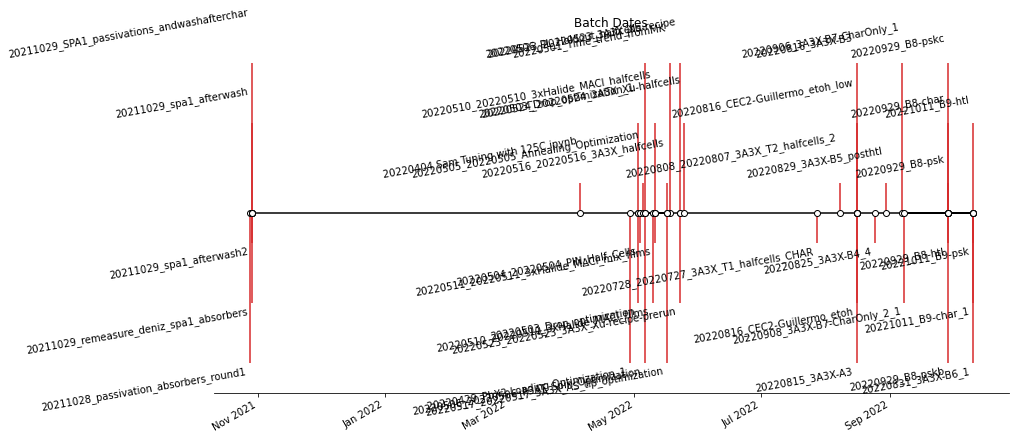

In [4]:
import matplotlib.dates as mdates
# plot the dates of batches


# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
	int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(14, 6), constrained_layout=True)
ax.set(title="Batch Dates")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
	color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for i, (d, l, b) in enumerate(zip(dates, levels, batch_dirs)):
	ax.annotate(b, xy=(d, l),
		xytext=(-3, np.sign(l)*3), textcoords="offset points",
		horizontalalignment="right",
		verticalalignment="bottom" if l > 0 else "top",
		rotation=10)

# format xaxis with 4 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()